In [ ]:
"""
This Jupyter Notebook demonstrates linear regression using both closed-form solution and gradient descent, with and without L2 regularization and data standardization.

1. Data Preparation:
    - Load the dataset and split it into features (X) and target (Y).
    - Add a bias term to the features.
    - Split the data into training and testing sets.

2. Linear Regression without Regularization:
    - Compute weights using closed-form solution.
    - Compute weights using gradient descent.
    - Plot and compare the actual vs predicted prices.

3. Linear Regression with L2 Regularization:
    - Standardize the features.
    - Compute weights using closed-form solution with L2 regularization.
    - Compute weights using gradient descent with L2 regularization.
    - Plot and compare the actual vs predicted prices with and without data standardization.

4. Comparison of L2 Regularization with Different Lambda Values:
    - Compute and plot predictions for different values of lambda using both closed-form solution and gradient descent with L2 regularization.
"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # for splitting

In [2]:
data = pd.read_csv('Mobile-Price-Prediction-cleaned_data.csv')
X = data.drop('Price', axis=1)
Y = data['Price']

X['bias'] = 1

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [4]:
def compute_weights_closed_form(X, Y):
  W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
  return W

In [5]:
def perform_gradient_descent(X, Y, learning_rate, num_iterations):
  W = np.zeros(X.shape[1])
  for _ in range(num_iterations):
      predictions = X.dot(W)
      errors = predictions - Y
      gradients = X.T.dot(errors) / X.shape[0]
      W -= learning_rate * gradients
  return W

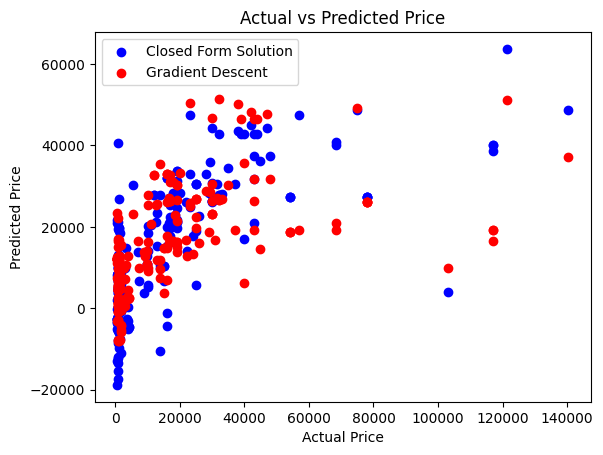

In [6]:
W_closed_form = compute_weights_closed_form(X_train, Y_train)
predictions_closed_form = X_test.dot(W_closed_form)
W_gradient_descent = perform_gradient_descent(X_train, Y_train, 1e-7, 100000)
predictions_gradient_descent = X_test.dot(W_gradient_descent)

plt.scatter(Y_test, predictions_closed_form, color='blue', label='Closed Form Solution')
plt.scatter(Y_test, predictions_gradient_descent, color='red', label='Gradient Descent')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.legend()
plt.savefig('linear_reg.png')
plt.show()

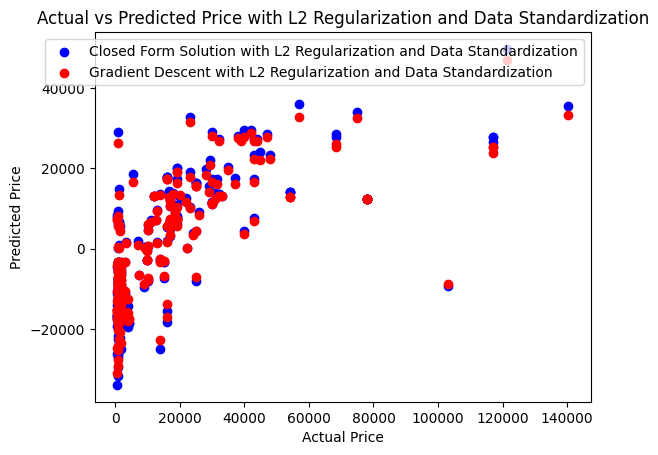

In [7]:
X_ = X.drop('bias', axis=1)

X_standardized = (X_ - X_.mean()) / X_.std()
X_train_standardized, X_test_standardized, Y_train, Y_test = train_test_split(X_standardized, Y, test_size = 0.3, random_state = 0)

def compute_weights_closed_form_L2(X, Y, alpha):
  W = np.linalg.inv(X.T.dot(X) + alpha * np.eye(X.shape[1])).dot(X.T).dot(Y)
  return W
  
def perform_gradient_descent_L2(X, Y, learning_rate, num_iterations, alpha):
  W = np.zeros(X.shape[1])
  for _ in range(num_iterations):
      predictions = X.dot(W)
      errors = predictions - Y
      gradients = X.T.dot(errors) / X.shape[0] + alpha * W
      W -= learning_rate * gradients
  return W

W_closed_form_L2 = compute_weights_closed_form_L2(X_train_standardized, Y_train, 0.1)
predictions_closed_form_L2 = X_test_standardized.dot(W_closed_form_L2)
W_gradient_descent_L2 = perform_gradient_descent_L2(X_train_standardized, Y_train, 0.0001, 100000, 0.1)
predictions_gradient_descent_L2 = X_test_standardized.dot(W_gradient_descent_L2)

plt.scatter(Y_test, predictions_closed_form_L2, color='blue', label='Closed Form Solution with L2 Regularization and Data Standardization')
plt.scatter(Y_test, predictions_gradient_descent_L2, color='red', label='Gradient Descent with L2 Regularization and Data Standardization')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price with L2 Regularization and Data Standardization')
plt.legend()
plt.savefig('linear_reg_L2.png')
plt.show()

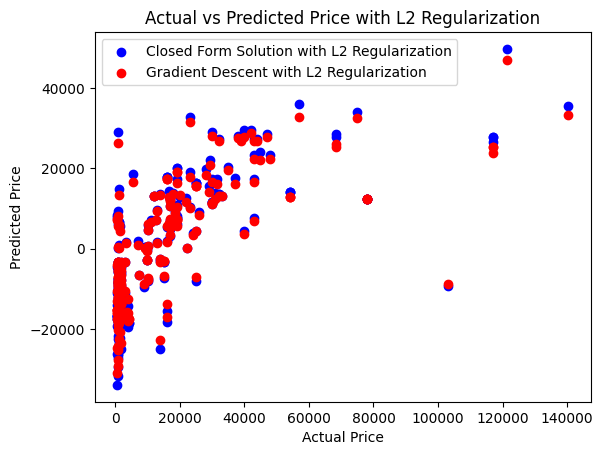

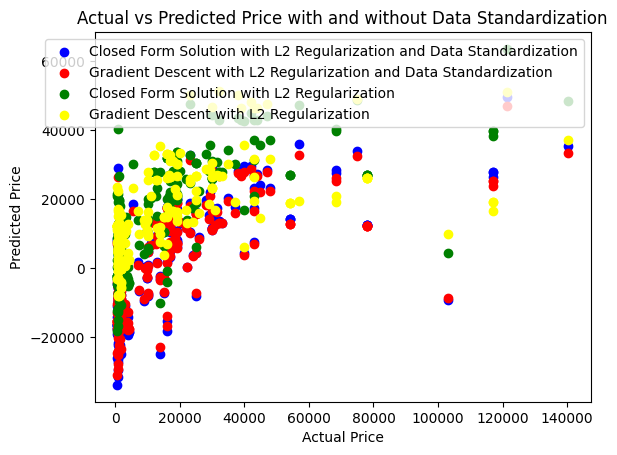

In [8]:
W_closed_form_L2_wstd = compute_weights_closed_form_L2(X_train, Y_train, 0.1)
predictions_closed_form_L2_wstd = X_test.dot(W_closed_form_L2_wstd)
W_gradient_descent_L2_wstd = perform_gradient_descent_L2(X_train, Y_train, 1e-7, 100000, 0.1)
predictions_gradient_descent_L2_wstd = X_test.dot(W_gradient_descent_L2_wstd)

plt.scatter(Y_test, predictions_closed_form_L2, color='blue', label='Closed Form Solution with L2 Regularization')
plt.scatter(Y_test, predictions_gradient_descent_L2, color='red', label='Gradient Descent with L2 Regularization')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price with L2 Regularization')
plt.legend()
plt.show()

plt.scatter(Y_test, predictions_closed_form_L2, color='blue', label='Closed Form Solution with L2 Regularization and Data Standardization')
plt.scatter(Y_test, predictions_gradient_descent_L2, color='red', label='Gradient Descent with L2 Regularization and Data Standardization')
plt.scatter(Y_test, predictions_closed_form_L2_wstd, color='green', label='Closed Form Solution with L2 Regularization')
plt.scatter(Y_test, predictions_gradient_descent_L2_wstd, color='yellow', label='Gradient Descent with L2 Regularization')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price with and without Data Standardization')
plt.legend()
plt.savefig('linear_reg_L2_comparison.png')
plt.show()

In [ ]:
lambdas = [0.01, 0.1, 1, 10, 100]

for lambda_ in lambdas:
  W_closed_form_L2 = compute_weights_closed_form_L2(X_train_standardized, Y_train, lambda_)
  Y_pred_closed_form_L2 = X_test_standardized.dot(W_closed_form_L2)
  W_gradient_descent_L2 = perform_gradient_descent_L2(X_train_standardized, Y_train, 0.0001, 100000, lambda_)
  Y_pred_gradient_descent_L2 = X_test_standardized.dot(W_gradient_descent_L2)
  plt.scatter(Y_test, Y_pred_closed_form_L2, label='Closed Form Solution with L2 Regularization and Data Standardization for λ = ' + str(lambda_))
  plt.scatter(Y_test, Y_pred_gradient_descent_L2, label='Gradient Descent with L2 Regularization and Data Standardization for λ = ' + str(lambda_))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price with L2 Regularization and Data Standardization for different λ values')
plt.legend()
plt.savefig('linear_reg_L2_lambda.png')
plt.show()